In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical

In [5]:
# Wczytanie danych CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Przygotowanie danych (normalizacja i one-hot encoding)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 30s 0us/step


In [6]:
# Budowa modelu CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Trenowanie modelu
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20


2023-10-28 09:52:21.112862: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


  1/391 [..............................] - ETA: 14:39 - loss: 5.8846 - accuracy: 0.1250

2023-10-28 09:52:32.613134: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.
2023-10-28 09:52:32.614316: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.


  2/391 [..............................] - ETA: 1:31 - loss: 7.6789 - accuracy: 0.1367 

2023-10-28 09:52:32.843657: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.
2023-10-28 09:52:32.843859: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28311552 exceeds 10% of free system memory.


391/391 [==============================] - 93s 232ms/step - loss: 1.7140 - accuracy: 0.4183 - val_loss: 2.2506 - val_accuracy: 0.3250
Epoch 2/20
391/391 [==============================] - 84s 215ms/step - loss: 1.1650 - accuracy: 0.5895 - val_loss: 0.9438 - val_accuracy: 0.6674
Epoch 3/20
391/391 [==============================] - 83s 211ms/step - loss: 0.9969 - accuracy: 0.6487 - val_loss: 0.8806 - val_accuracy: 0.6975
Epoch 4/20
391/391 [==============================] - 84s 214ms/step - loss: 0.8899 - accuracy: 0.6900 - val_loss: 0.8813 - val_accuracy: 0.6998
Epoch 5/20
391/391 [==============================] - 82s 209ms/step - loss: 0.8158 - accuracy: 0.7145 - val_loss: 0.7295 - val_accuracy: 0.7480
Epoch 6/20
391/391 [==============================] - 82s 209ms/step - loss: 0.7486 - accuracy: 0.7404 - val_loss: 0.7792 - val_accuracy: 0.7387
Epoch 7/20
391/391 [==============================] - 81s 207ms/step - loss: 0.7014 - accuracy: 0.7537 - val_loss: 0.7136 - val_accuracy: 0.7

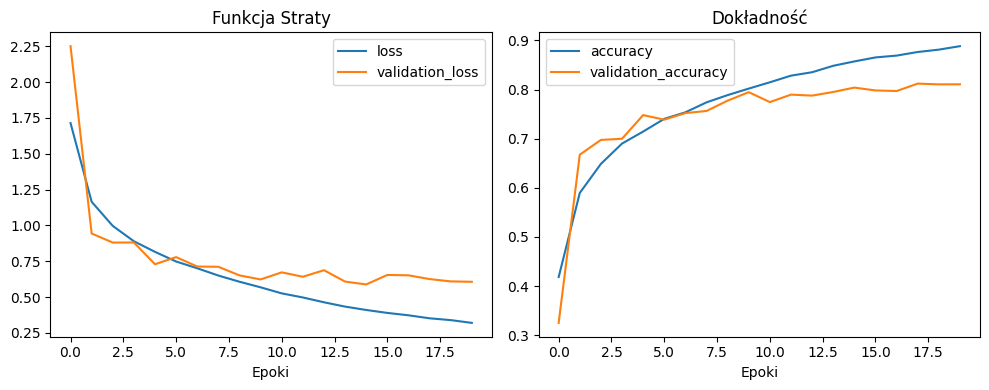

: 

In [9]:
# Wizualizacja krzywej uczenia
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Funkcja Straty')
plt.xlabel('Epoki')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Dokładność')
plt.xlabel('Epoki')
plt.legend()

plt.tight_layout()
plt.show()